## **Data reading and formatting**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd /content/drive/My Drive/object file/project data/Edited data

/content/drive/My Drive/object file/project data/Edited data


In [2]:
# Reading the dataset

data = pd.read_csv('housing_data.csv')

In [3]:
# Changing the datatype for the index column

data['Period End'] = data['Period End'].astype('datetime64[M]')

In [4]:
data.sort_values(by='Period End', inplace=True)

In [5]:
# Displaying the number of properties in a given metropolitan area

data['parent_metro_region'].value_counts()

Orlando, FL           102
Cincinnati, OH        102
El Paso, TX           102
Vineyard Haven, MA    102
Poughkeepsie, NY      102
                     ... 
Wahpeton, ND           23
Kingsville, TX         21
Huntington, WV         19
Alice, TX              14
Beatrice, NE            8
Name: parent_metro_region, Length: 418, dtype: int64

In [6]:
# Number of metropolitan areas in the data set

len(data['parent_metro_region'].unique())

418

In [7]:
# Setting the index columns for the dataset

data.set_index('Period End', inplace=True)

In [8]:
data.index

DatetimeIndex(['2012-02-01', '2012-02-01', '2012-02-01', '2012-02-01',
               '2012-02-01', '2012-02-01', '2012-02-01', '2012-02-01',
               '2012-02-01', '2012-02-01',
               ...
               '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01',
               '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01',
               '2020-07-01', '2020-07-01'],
              dtype='datetime64[ns]', name='Period End', length=40679, freq=None)

In [9]:
# Displaying the list of features for the dataset

data.columns

Index(['Unnamed: 0', 'Region', 'Month of Period End', 'Property Type',
       'Region Type', 'Seasonally Adjusted', 'State Code', 'City',
       'last_updated', 'Measure Display', 'parent_metro_region',
       'Period Begin', 'State', 'Table Id', 'Worksheet Filter',
       'active_listings', 'active_listings_mom', 'active_listings_yoy',
       'Avg Sale To List', 'Avg Sale To List Mom', 'Avg Sale To List Yoy',
       'Homes Sold', 'Homes Sold Mom', 'Homes Sold Yoy', 'Inventory',
       'Inventory Mom', 'Inventory Yoy', 'Median Dom', 'Median Dom Mom',
       'Median Dom Yoy', 'Median List Ppsf', 'Median List Ppsf Mom',
       'Median List Ppsf Yoy', 'Median List Price', 'Median List Price Mom',
       'Median List Price Yoy', 'Median Ppsf', 'Median Ppsf Mom',
       'Median Ppsf Yoy', 'Median Sale Price', 'Median Sale Price Mom',
       'Median Sale Price Yoy', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'New Listings', 'New Listings Mom',
       'New List

In [10]:
# Choosing relevant columnd for analysis and modeling

cols = ['Geo Region', 'Property Type', 'State Code', 'parent_metro_region', 'active_listings', 'Median Dom', 'Avg Sale To List', 'Homes Sold', 
        'New Listings', 'Inventory', 'pending_sales', 'months_of_supply', 'Median Sale Price', ]

In [14]:
# Data table with the relevant predictors of the Median sale price

data = data[cols[:-1]]
data.head()

,Geo Region,Property Type,State Code,parent_metro_region,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply
Period End,,,,,,,,,,,,
2012-02-01,South,All Residential,FL,"Orlando, FL",21554.0,120.0,0.963734,2478.0,3744.0,18765.0,1151.0,7.6
2012-02-01,South,All Residential,TX,"San Antonio, TX",10658.0,90.0,0.958310,1301.0,2232.0,8625.0,1005.0,6.6
2012-02-01,Midwest,All Residential,MI,"Sturgis, MI",355.0,102.0,0.897743,26.0,50.0,333.0,13.0,12.8
2012-02-01,West,All Residential,CA,"Vallejo, CA",1745.0,44.0,0.987707,485.0,566.0,1092.0,454.0,2.3
2012-02-01,West,All Residential,CA,"San Diego, CA",13044.0,62.0,0.970295,2548.0,3699.0,9099.0,2561.0,3.6


In [33]:
# Checking for missing values in the data

data.isna().sum()

Geo Region               0
Property Type            0
State Code               0
parent_metro_region      0
active_listings         34
Median Dom             423
Avg Sale To List       269
Homes Sold              69
New Listings           374
Inventory              319
pending_sales          655
months_of_supply       123
Median Sale Price       69
dtype: int64

In [34]:
# Grouping the properties according to geographical area for better analysis

data.loc[(data['Geo Region'] == 'South') & (data['State Code'] == 'DC'), 'Geo Region'] = 'Northeast'
data.loc[(data['Geo Region'] == 'South') & (data['State Code'] == 'DE'), 'Geo Region'] = 'Northeast'
data.loc[(data['Geo Region'] == 'South') & (data['State Code'] == 'MD'), 'Geo Region'] = 'Northeast'

In [35]:
# Filling the missing data columns using interpolation

for i in ['active_listings', 'Median Dom', 'Avg Sale To List', 'Homes Sold', 'New Listings', 'Inventory', 'pending_sales', 'months_of_supply']:
  data[i] = data[i].fillna(data[i].interpolate(method='linear')) 
 

In [36]:
# Converting the sales price to a string type

data['Median Sale Price'] = data['Median Sale Price'].astype('str')

In [37]:
# Further formatting of the Median sales column

data['Median Sale Price'] = data['Median Sale Price'].apply(lambda x: x.replace('$', ''));
data['Median Sale Price'] = data['Median Sale Price'].apply(lambda x: x.replace('K', '000'));
data['Median Sale Price'] = data['Median Sale Price'].apply(lambda x: x.replace(',', ''));
data['Median Sale Price'] = data['Median Sale Price'].apply(lambda x: x.replace('<NA>', '0'));
# data['Median Sale Price'] = data['Median Sale Price'].apply(lambda x: x.replace('nan', '0'));

In [38]:
data.head()

,Geo Region,Property Type,State Code,parent_metro_region,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply,Median Sale Price
Period End,,,,,,,,,,,,,
2012-02-01,South,All Residential,FL,"Orlando, FL",21554.0,120.0,0.963734,2478.0,3744.0,18765.0,1151.0,7.6,115000
2012-02-01,South,All Residential,TX,"San Antonio, TX",10658.0,90.0,0.958310,1301.0,2232.0,8625.0,1005.0,6.6,150000
2012-02-01,Midwest,All Residential,MI,"Sturgis, MI",355.0,102.0,0.897743,26.0,50.0,333.0,13.0,12.8,29000
2012-02-01,West,All Residential,CA,"Vallejo, CA",1745.0,44.0,0.987707,485.0,566.0,1092.0,454.0,2.3,170000
2012-02-01,West,All Residential,CA,"San Diego, CA",13044.0,62.0,0.970295,2548.0,3699.0,9099.0,2561.0,3.6,302000


In [39]:
# All NaN values have been replaced

data.isna().sum()

Geo Region             0
Property Type          0
State Code             0
parent_metro_region    0
active_listings        0
Median Dom             0
Avg Sale To List       0
Homes Sold             0
New Listings           0
Inventory              0
pending_sales          0
months_of_supply       0
Median Sale Price      0
dtype: int64

In [40]:
# Converting the median sales price columns to a floating datatype

data['Median Sale Price'] = data['Median Sale Price'].astype('float')

In [41]:
# Replacing missing values for the mean sales price column

data['Median Sale Price'] = data['Median Sale Price'].interpolate()

In [42]:
data['Median Sale Price'] = data['Median Sale Price'].astype('int')

In [43]:
# Correcting the regional classification of DC

data.loc[(data['Geo Region'] == 'South') & (data['State Code'] == 'DC'), 'Geo Region'] = 'Northeast'

In [44]:
# Checking the Washington DC data

data[data['State Code']=='DC'].head()

,Geo Region,Property Type,State Code,parent_metro_region,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply,Median Sale Price
Period End,,,,,,,,,,,,,
2012-02-01,Northeast,All Residential,DC,"Washington, DC",21201.0,63.0,0.976828,3663.0,5998.0,15629.0,3660.0,4.3,278000
2012-03-01,Northeast,All Residential,DC,"Washington, DC",23450.0,50.0,0.980301,4521.0,8228.0,16523.0,5089.0,3.7,307000
2012-04-01,Northeast,All Residential,DC,"Washington, DC",23712.0,32.0,0.982807,4967.0,7599.0,16944.0,5352.0,3.4,325000
2012-05-01,Northeast,All Residential,DC,"Washington, DC",23895.0,26.0,0.986873,5864.0,7284.0,16991.0,5395.0,2.9,337000
2012-06-01,Northeast,All Residential,DC,"Washington, DC",23345.0,28.0,0.985886,6229.0,6704.0,16966.0,4876.0,2.7,350000


## Data Exploration and analysis

The data columns' information are plotted below with the information aggregated by regional areas and states based on their the mean sale prices. 

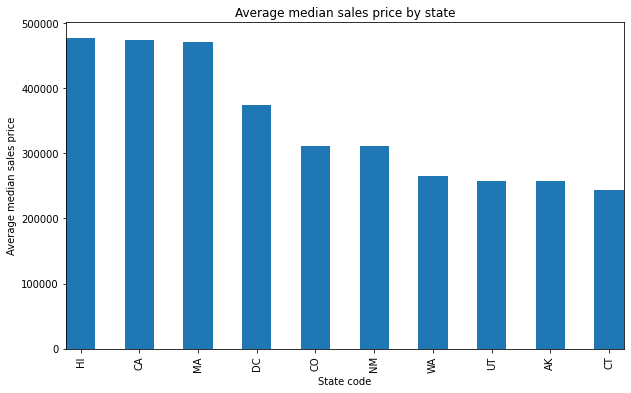

In [26]:
data.groupby('State Code').mean().sort_values('Median Sale Price', ascending=False)['Median Sale Price'][:10].plot.bar(figsize=(10,6)).autoscale(axis='x', tight=True)
plt.title('Average median sales price by state');
plt.ylabel('Average median sales price');
plt.xlabel('State code');

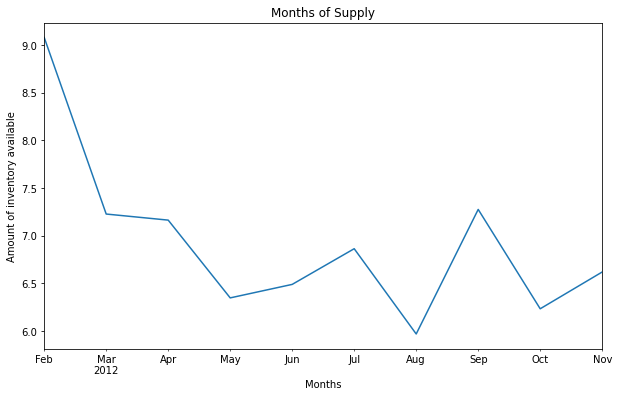

In [28]:
data.groupby(data.index).mean()['months_of_supply'][:10].plot(figsize=(10,6)).autoscale(axis='x', tight=True)
plt.title('Months of Supply');
plt.xlabel('Months');
plt.ylabel('Amount of inventory available');

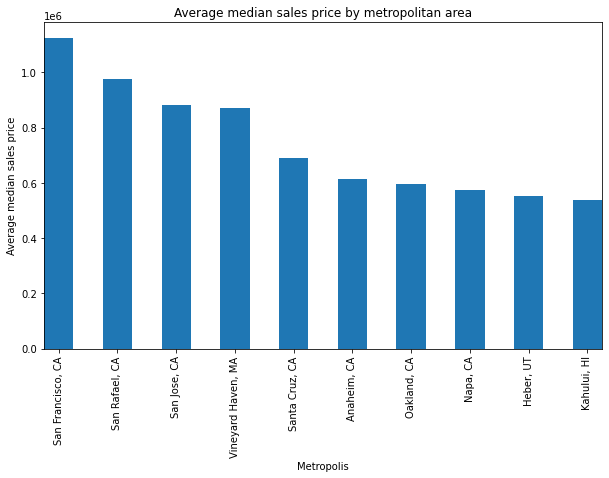

In [29]:
data.groupby('parent_metro_region').mean().sort_values('Median Sale Price', ascending=False)['Median Sale Price'][:10].plot.bar(figsize=(10,6)).autoscale(axis='x', tight=True)
plt.title('Average median sales price by metropolitan area');
plt.xlabel('Metropolis');
plt.ylabel('Average median sales price');

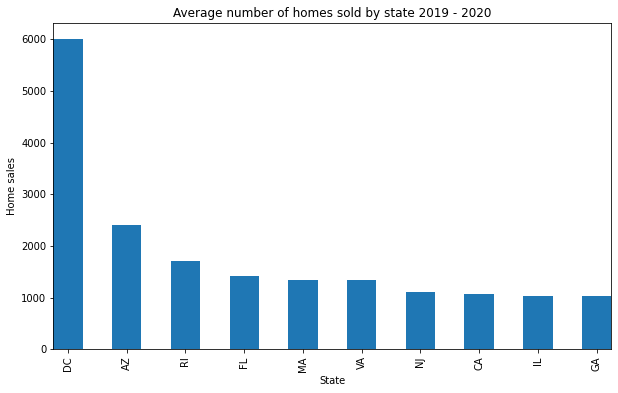

In [30]:
data['2019-01-01':].groupby('State Code').mean().sort_values('Homes Sold', ascending=False)['Homes Sold'][:10].plot.bar(figsize=(10,6)).autoscale(axis='x', tight=True)
plt.title('Average number of homes sold by state 2019 - 2020');
plt.ylabel('Home sales');
plt.xlabel('State');

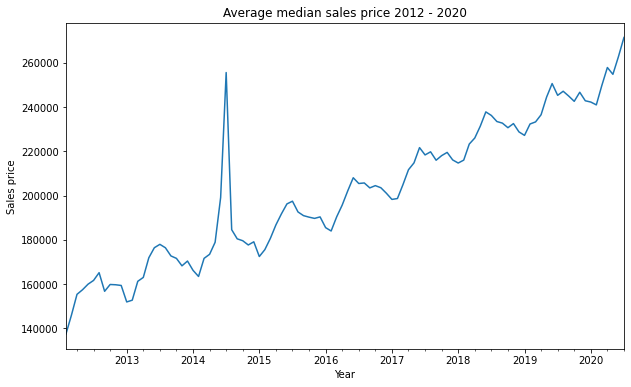

In [31]:
data.groupby(data.index).mean()['Median Sale Price'].plot(figsize=(10,6)).autoscale(axis='x', tight=True)
plt.title('Average median sales price 2012 - 2020');
plt.ylabel('Sales price');
plt.xlabel('Year');

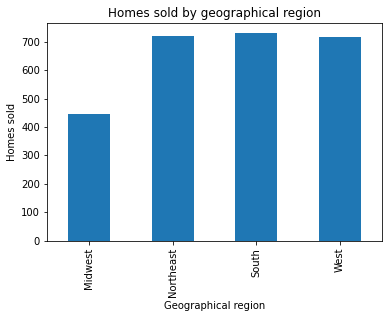

In [32]:
data.groupby('Geo Region').mean()['Homes Sold'].plot.bar()
plt.title('Homes sold by geographical region')
plt.ylabel('Homes sold');
plt.xlabel('Geographical region');

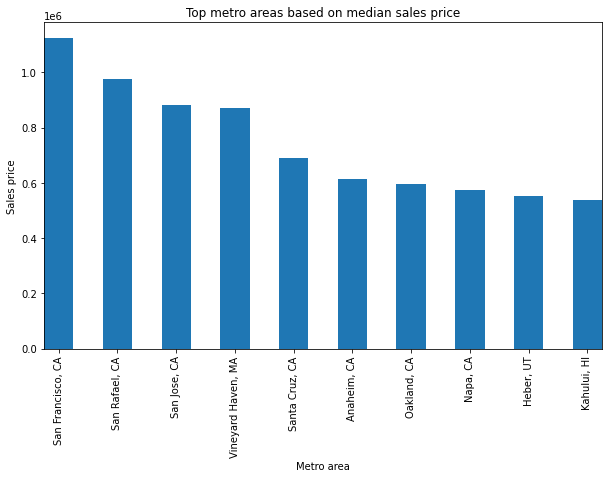

In [36]:
data.groupby('parent_metro_region').mean().sort_values('Median Sale Price', ascending=False)['Median Sale Price'][:10].plot.bar(figsize=(10,6)).autoscale(axis='x', tight=True)
plt.title('Top metro areas based on median sales price');
plt.ylabel('Sales price');
plt.xlabel('Metro area');

In [45]:
df_top5 = data[(data['State Code']=='HI') | (data['State Code']=='CA') | (data['State Code']=='MA') | (data['State Code']=='DC') | (data['State Code']=='NM')]

In [46]:
df_top5.head()

,Geo Region,Property Type,State Code,parent_metro_region,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply,Median Sale Price
Period End,,,,,,,,,,,,,
2012-02-01,West,All Residential,CA,"Vallejo, CA",1745.0,44.0,0.987707,485.0,566.0,1092.0,454.0,2.3,170000
2012-02-01,West,All Residential,CA,"San Diego, CA",13044.0,62.0,0.970295,2548.0,3699.0,9099.0,2561.0,3.6,302000
2012-02-01,Northeast,All Residential,DC,"Washington, DC",21201.0,63.0,0.976828,3663.0,5998.0,15629.0,3660.0,4.3,278000
2012-02-01,West,All Residential,NM,"Santa Fe, NM",761.0,171.0,0.985821,99.0,94.0,682.0,21.0,6.9,295000
2012-02-01,West,All Residential,CA,"Clearlake, CA",446.0,100.0,0.962962,80.0,82.0,361.0,41.0,4.5,105000


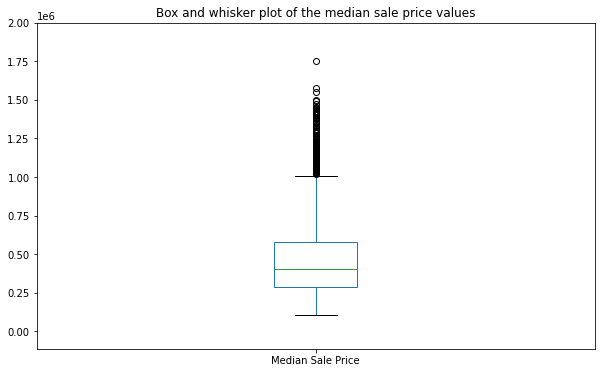

In [37]:
# Exploring the dataset for the target column

df_top5[['Median Sale Price']].plot.box(figsize=(10,6)).autoscale(axis='x', tight=True)
plt.ylim(top=2000000);
plt.title('Box and whisker plot of the median sale price values');

In [38]:
import seaborn as sns

In [39]:
df_top5.describe().T

,count,mean,std,min,25%,50%,75%,max
active_listings,3762.0,4443.235779,6402.451265,23.000000,817.00000,1651.000000,4111.000000,3.290500e+04
Median Dom,3762.0,59.278841,60.017219,7.000000,26.00000,42.000000,68.000000,1.079000e+03
Avg Sale To List,3762.0,0.986702,0.025828,0.828685,0.97525,0.986109,0.996225,1.121664e+00
Homes Sold,3762.0,1152.489102,1648.661126,2.000000,190.00000,427.500000,1119.500000,8.639000e+03
New Listings,3762.0,1376.784689,2031.706513,1.000000,210.00000,476.500000,1319.500000,1.086500e+04
Inventory,3762.0,3087.669856,4529.396669,11.000000,560.25000,1229.500000,3018.500000,2.557000e+04
pending_sales,3762.0,1028.308878,1523.828145,1.000000,119.00000,337.500000,1095.000000,8.032000e+03
months_of_supply,3762.0,3.668740,3.348194,0.300000,2.10000,2.900000,4.100000,5.700000e+01
Median Sale Price,3762.0,462801.701223,252067.176018,104000.000000,287000.00000,405000.000000,580000.000000,4.426000e+06


In [47]:
# Aggregating the top five states data by month

df_top5 = df_top5.resample('MS').mean()
df_top5.head()

,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply,Median Sale Price
Period End,,,,,,,,,
2012-02-01,5557.805556,100.138889,0.966955,921.555556,1406.055556,4176.861111,845.722222,5.433333,286972.222222
2012-03-01,5702.027778,98.388889,0.972665,1182.583333,1629.138889,4110.000000,1064.916667,4.350000,294083.333333
2012-04-01,5541.722222,88.305556,0.973483,1190.277778,1524.888889,4063.138889,1044.138889,4.119444,308111.111111
2012-05-01,5518.000000,79.416667,0.977199,1355.277778,1545.444444,3948.916667,1125.250000,4.836111,318055.555556
2012-06-01,5304.888889,74.416667,0.980372,1388.638889,1436.916667,3808.527778,1049.027778,3.647222,319583.333333


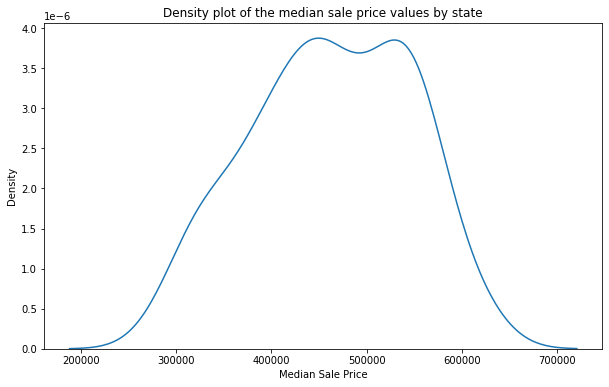

In [41]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_top5['Median Sale Price'])
plt.title('Density plot of the median sale price values by state')
plt.show()

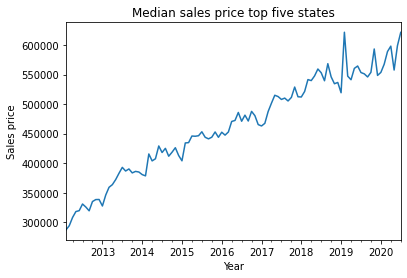

In [42]:
df_top5['Median Sale Price'].plot.line()
plt.title('Median sales price top five states');
plt.ylabel('Sales price');
plt.xlabel('Year');

## Data Modeling And Evaluation

The three models used for modeling the forecasting model are the classical VAR(n) model, facebook's prophet library and an LSTM RNN model. The best model based on performance will be used for making forecast into the future for the median sales price of the top five states with the highest property values. 

In [124]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: 
        print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      dataset.loc[r,c] = min_p_value
  dataset.columns = [var + '_x' for var in variables]
  dataset.index = [var + '_y' for var in variables]

  return dataset

grangers_causality_matrix(df_top5, variables=df_top5.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,active_listings_x,Median Dom_x,Avg Sale To List_x,Homes Sold_x,New Listings_x,Inventory_x,pending_sales_x,months_of_supply_x,Median Sale Price_x
active_listings_y,1.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0057
Median Dom_y,0.0,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000
Avg Sale To List_y,0.0,0.0005,1.0000,0.0000,0.0,0.0,0.0,0.0017,0.0268
Homes Sold_y,0.0,0.0011,0.0000,1.0000,0.0,0.0,0.0,0.0000,0.0001
New Listings_y,0.0,0.0009,0.0034,0.0000,1.0,0.0,0.0,0.0000,0.0136
Inventory_y,0.0,0.0000,0.0000,0.0000,0.0,1.0,0.0,0.0000,0.0012
pending_sales_y,0.0,0.0436,0.0002,0.0000,0.0,0.0,1.0,0.0001,0.1148
months_of_supply_y,0.0,0.0000,0.0000,0.0001,0.0,0.0,0.0,1.0000,0.0000
Median Sale Price_y,0.0,0.0106,0.0000,0.0000,0.0,0.0,0.0,0.0483,1.0000


The granger causality test is used to determine if a time series can be used to predict another time series. The dataset presents a multivariate time series where other features in the data is used to predict the median sale price.

In [125]:
# Splitting the data into training and testing data

obs = 10
df_train, df_test = df_top5[:-obs], df_top5[-obs:]

In [126]:
from statsmodels.tsa.api import seasonal_decompose;

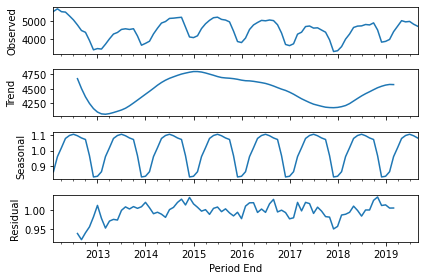

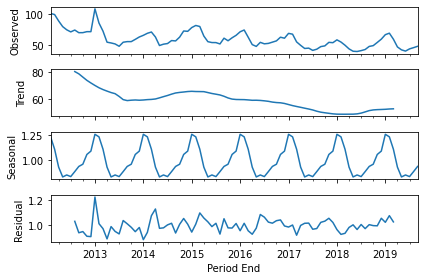

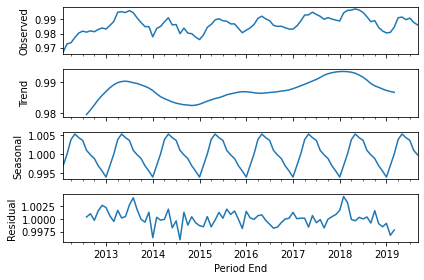

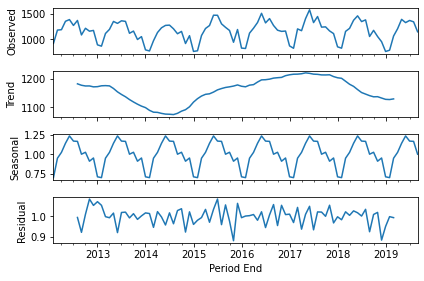

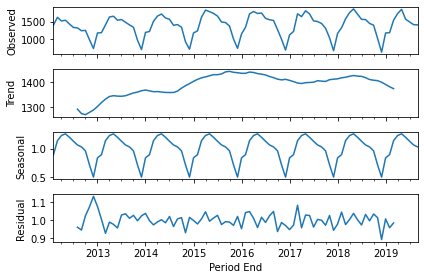

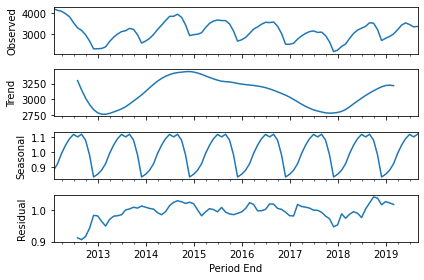

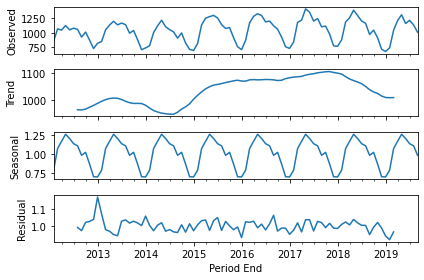

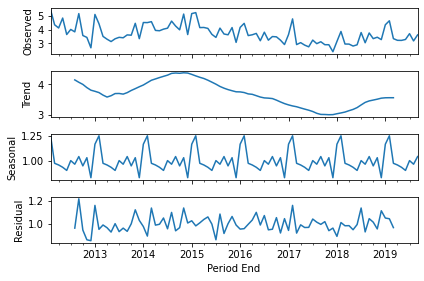

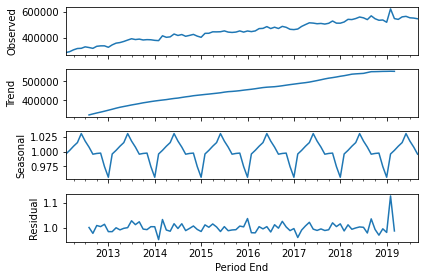

In [127]:
# Checking for seasonality and trend in the dataset

for i in df_train.columns:
  results = seasonal_decompose(df_train[i], model='multiplicative')
  results.plot()  

Differencing is a good way to remove seasonality in the dataset. The data is best modeled when it is stationary i.e. it shows no seasonality or trend. This is important for statistical purposes.An example of a statistical test is below. The cointegration test is a statistical test to know if the time series (columns) will have a long run equillibrium and can be used to modeling the sales price column.

In [128]:
diff_train = df_train.diff().dropna()

In [129]:
# Cointegration test

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(diff_train)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
active_listings ::  418.27    > 179.5199  =>   True
Median Dom ::  315.12    > 143.6691  =>   True
Avg Sale To List ::  217.31    > 111.7797  =>   True
Homes Sold ::  153.94    > 83.9383   =>   True
New Listings ::  110.15    > 60.0627   =>   True
Inventory ::  71.46     > 40.1749   =>   True
pending_sales ::  44.49     > 24.2761   =>   True
months_of_supply ::  21.49     > 12.3212   =>   True
Median Sale Price ::  7.83      > 4.1296    =>   True


In [130]:
# checking if the columns are stationary after the first differencing

from statsmodels.tsa.stattools import adfuller

for i in diff_train.columns:
  result = adfuller(x=diff_train[i].values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < value:
    print('\n','The series is stationary')
  else:
    print('\n','The series is non-stationary')
  print()

ADF Statistic: -4.221561
p-value: 0.000606
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587

 The series is stationary

ADF Statistic: -7.548718
p-value: 0.000000
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586

 The series is stationary

ADF Statistic: -2.376015
p-value: 0.148621
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587

 The series is non-stationary

ADF Statistic: -2.810336
p-value: 0.056812
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587

 The series is stationary

ADF Statistic: -5.293824
p-value: 0.000006
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587

 The series is stationary

ADF Statistic: -3.788349
p-value: 0.003029
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587

 The series is stationary

ADF Statistic: -3.122845
p-value: 0.024908
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587

 The series is stationary

ADF Statistic: -2.565373
p-value: 0.100367
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587

 The series is non-stat

In [131]:
# Second differencing to make the columns stationary

diff_train2 = diff_train.diff().dropna()

In [132]:
# Second test stationarity

for i in diff_train2.columns:
  result = adfuller(x=diff_train2[i].values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < value:
    print('\n','The series is stationary')
  else:
    print('\n','The series is non-stationary')
  print()

ADF Statistic: -3.037153
p-value: 0.031567
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587

 The series is stationary

ADF Statistic: -7.609272
p-value: 0.000000
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587

 The series is stationary

ADF Statistic: -6.995585
p-value: 0.000000
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587

 The series is stationary

ADF Statistic: -10.328818
p-value: 0.000000
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587

 The series is stationary

ADF Statistic: -9.096741
p-value: 0.000000
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587

 The series is stationary

ADF Statistic: -2.761285
p-value: 0.064020
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587

 The series is stationary

ADF Statistic: -8.302530
p-value: 0.000000
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587

 The series is stationary

ADF Statistic: -6.115090
p-value: 0.000000
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587

 The series is stationary


### Training a VAR model 

In [133]:
from statsmodels.tsa.api import VAR

In [134]:
model = VAR(diff_train2[diff_train2.columns])
for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  50.62103427097303
BIC :  53.13763284710665
FPE :  9.73106540376911e+21
HQIC:  51.63540293749632 

Lag Order = 2
AIC :  47.59039858401846
BIC :  52.40431443942497
FPE :  4.957165256827813e+20
HQIC:  49.52980444475625 

Lag Order = 3
AIC :  45.860038498044204
BIC :  53.00266891069886
FPE :  1.0220243833954805e+20
HQIC:  48.73615551139287 

Lag Order = 4
AIC :  43.55082685794271
BIC :  53.05428790041269
FPE :  1.4060727855995828e+19
HQIC:  47.37552964296956 

Lag Order = 5
AIC :  42.66702197910427
BIC :  54.564170451892394
FPE :  1.0848587945733773e+19
HQIC:  47.45238785727626 

Lag Order = 6
AIC :  40.4212317452387
BIC :  54.74568788127965
FPE :  3.645847008566014e+18
HQIC:  46.17954253776735 

Lag Order = 7
AIC :  34.983038584730764
BIC :  51.76920954968065
FPE :  1.4528343899098198e+17
HQIC:  41.72678212482084 

Lag Order = 8
AIC :  12.245827718800815
BIC :  31.528931931637576
FPE :  3046448525.2256823
HQIC:  19.98769903284859 

Lag Order = 9
AIC :  -287.0940773160

In [135]:
model.select_order(8).summary()

,AIC,BIC,FPE,HQIC
0,59.20,59.47,5.152e+25,59.31
1,50.47,53.11,8.407e+21,51.53
2,47.61,52.63,5.115e+20,49.62
3,45.79,53.19,9.949e+19,48.76
4,43.25,53.03,1.142e+19,47.18
5,42.33,54.48,9.043e+18,47.21
6,40.12,54.65,3.390e+18,45.96
7,34.44,51.35,1.092e+17,41.23
8,12.25*,31.53*,3.046e+09*,19.99*


In [136]:
fitted_model = model.fit(maxlags=8)
fitted_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Sep, 2021
Time:                     13:34:09
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    31.5289
Nobs:                     82.0000    HQIC:                   19.9877
Log likelihood:          -892.256    FPE:                3.04645e+09
AIC:                      12.2458    Det(Omega_mle):     9.88856e+06
--------------------------------------------------------------------
Results for equation active_listings
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -1.878275        14.152997           -0.133           0.894
L1.active_listings           2.489425        11.163018            0.223           0.824
L1.Median Dom         

The lagg order of 8 produced the best statistical result. The durbin watson test is used to check for correlation of errors for the columns. A range between 1.5 to 2.5 is good while above or below indicates correlation of errors with other columns.   

In [137]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(diff_train2.columns, out):
    print(col, ':', round(val, 2))

active_listings : 1.76
Median Dom : 1.42
Avg Sale To List : 1.56
Homes Sold : 1.2
New Listings : 1.73
Inventory : 1.69
pending_sales : 1.9
months_of_supply : 1.48
Median Sale Price : 1.5


In [138]:
lag_order = fitted_model.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = diff_train2.values[-lag_order:]
fc = fitted_model.forecast(y=forecast_input, steps=obs)
df_forecast = pd.DataFrame(fc, index=df_top5.index[-obs:], columns=df_top5.columns + '_2d')
df_forecast

8


,active_listings_2d,Median Dom_2d,Avg Sale To List_2d,Homes Sold_2d,New Listings_2d,Inventory_2d,pending_sales_2d,months_of_supply_2d,Median Sale Price_2d
Period End,,,,,,,,,
2019-10-01,-575.950633,18.860149,-0.007174,341.943830,-720.460560,-639.908808,10.954994,1.846940,23984.741267
2019-11-01,54.460696,-21.290386,0.017153,-318.068861,748.151256,393.297273,-323.379932,-8.064454,-13689.429253
2019-12-01,659.917534,-13.178355,-0.012697,-389.372485,200.785575,224.988878,559.778671,9.153476,-72688.464095
2020-01-01,907.353035,7.322840,0.013604,696.904534,723.826259,457.076073,387.926274,-1.550095,39169.654055
2020-02-01,-1363.236701,7.191854,0.000817,433.592340,-1828.367516,-810.047583,-584.474309,-4.709376,167248.349737
2020-03-01,122.731738,-3.687254,-0.033239,-618.936972,936.397439,87.095414,70.418636,4.590359,-121209.491255
2020-04-01,326.049348,7.703913,0.042162,211.731464,229.654092,457.540289,-173.983691,-2.274770,-113111.121986
2020-05-01,483.971038,6.286045,-0.020752,-477.267923,49.428244,211.937577,238.711950,-0.458179,42151.654533
2020-06-01,310.991265,-37.697162,-0.001163,415.243321,65.469625,35.739267,425.822886,2.457789,91348.622695


In [139]:
# Reverting back the differencing to get the forecast to original scale

def invert_transformation(df_train, df_forecast, second_diff=False):
    
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [140]:
# Showing the forecast results 

df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results = df_results[['active_listings_forecast', 'Median Dom_forecast', 'Avg Sale To List_forecast', 'Homes Sold_forecast',
                   'Median Sale Price_forecast', 'New Listings_forecast', 'Inventory_forecast', 'pending_sales_forecast', 'months_of_supply_forecast']]

In [141]:
df_results = pd.DataFrame(df_results, columns=df_results.columns, index=df_results.index)

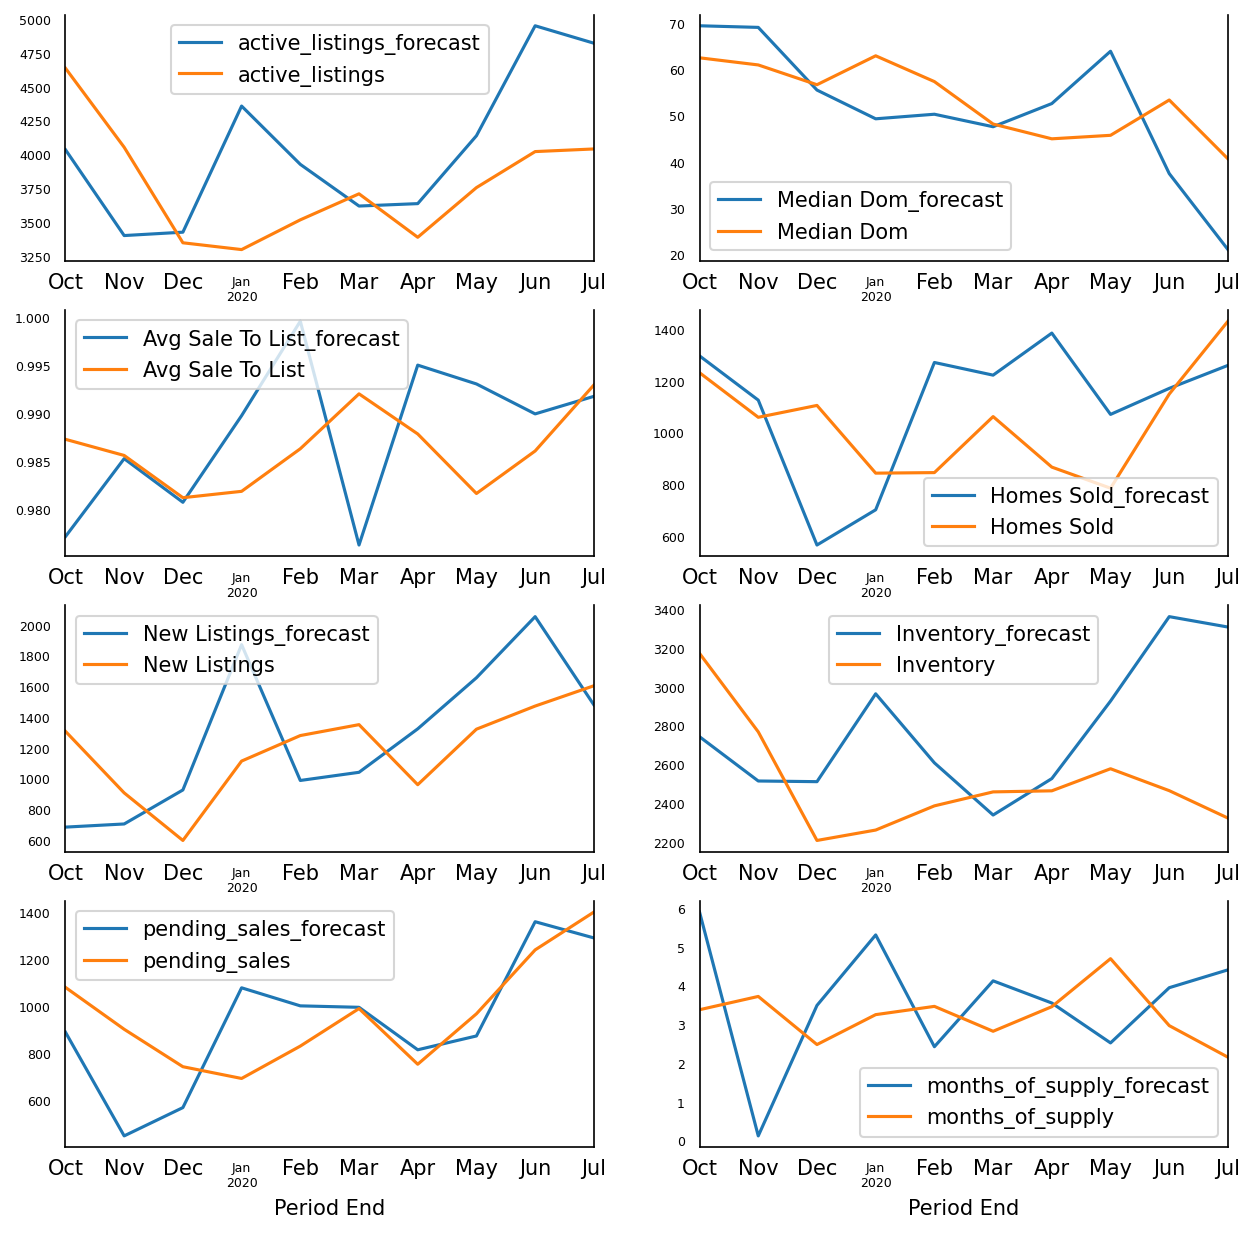

In [142]:
# Showing the forecast and original values for the columns for the last ten months of the dataset 

fig, axes = plt.subplots(nrows=int(len(df_top5.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_top5.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-obs:].plot(legend=True, ax=ax);
    # ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

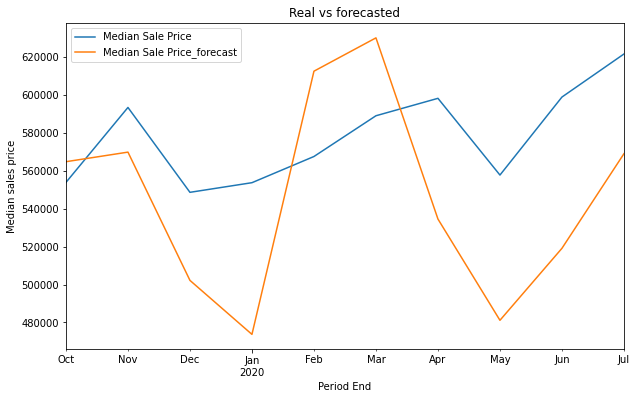

In [143]:

df_test['Median Sale Price'].plot(figsize=(10,6)).autoscale(axis='x', tight=True)
df_results['Median Sale Price_forecast'].plot(figsize=(10,6)).autoscale(axis='x', tight=True)
plt.ylabel('Median sales price')
plt.title('Real vs forecasted')
plt.legend()
plt.show()

In [144]:
df_results

,active_listings_forecast,Median Dom_forecast,Avg Sale To List_forecast,Homes Sold_forecast,Median Sale Price_forecast,New Listings_forecast,Inventory_forecast,pending_sales_forecast,months_of_supply_forecast
Period End,,,,,,,,,
2019-10-01,4035.427745,69.346635,0.977108,1296.430317,564768.525051,684.052954,2741.956057,890.036075,5.900994
2019-11-01,3400.478348,68.997479,0.985249,1125.224206,569820.593822,704.500407,2513.479656,450.259786,0.118614
2019-12-01,3425.446485,55.469967,0.980692,564.645609,502184.198499,925.733435,2509.992134,570.262168,3.489711
2020-01-01,4357.767658,49.265295,0.989739,700.971547,473717.457230,1870.792723,2963.580686,1078.190824,5.310713
2020-02-01,3926.852130,50.252477,0.999603,1270.889825,612499.065698,987.484495,2607.121654,1001.645170,2.422338
2020-03-01,3618.668339,47.552404,0.976229,1221.871130,630071.182911,1040.573706,2337.758037,995.518153,4.124323
2020-04-01,3636.533897,52.556245,0.995016,1384.583900,534532.178137,1323.317008,2525.934709,815.407445,3.551538
2020-05-01,4138.370492,63.846131,0.993051,1070.028746,481144.827897,1655.488555,2926.048958,874.008687,2.520575
2020-06-01,4951.198353,37.438854,0.989923,1170.716913,519106.100352,2053.129727,3361.902474,1358.432814,3.947400


In [145]:
df_test

,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply,Median Sale Price
Period End,,,,,,,,,
2019-10-01,4637.621622,62.432432,0.987268,1231.243243,1307.216216,3172.027027,1080.054054,3.378378,553837.837838
2019-11-01,4053.108108,60.891892,0.985583,1058.810811,906.675676,2767.027027,902.405405,3.721622,593378.378378
2019-12-01,3347.054054,56.621622,0.981171,1104.756757,597.243243,2206.486486,743.621622,2.478378,548621.621622
2020-01-01,3296.783784,62.864865,0.981836,842.729730,1113.621622,2260.216216,693.756757,3.251351,553702.702703
2020-02-01,3516.648649,57.297297,0.986283,844.810811,1279.621622,2385.081081,831.027027,3.464865,567513.513514
2020-03-01,3709.081081,48.135135,0.992018,1061.567568,1350.621622,2457.216216,990.162162,2.821622,589000.000000
2020-04-01,3387.729730,44.945946,0.987829,866.081081,960.000000,2462.729730,754.054054,3.456757,598189.189189
2020-05-01,3754.945946,45.702703,0.981610,784.513514,1321.081081,2576.675676,967.945946,4.697297,557729.729730
2020-06-01,4021.216216,53.324324,0.986052,1148.756757,1471.486486,2463.540541,1238.972973,2.967568,598864.864865


In [146]:
# Checking for forecast error

from sklearn.metrics import mean_squared_error
errors = []
for i in range(len(df_test)):
  err = mean_squared_error(df_test, df_results, squared=False)
  errors.append(err)
print('RMSE for the overall forecast:', mean_squared_error(df_test, df_forecast, squared=False))

RMSE for the overall forecast: 193388.94256046414


### Facebook library model

In [147]:
from fbprophet import Prophet

In [148]:
df2 = df_top5
df2.head()

,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply,Median Sale Price
Period End,,,,,,,,,
2012-02-01,5557.805556,100.138889,0.966955,921.555556,1406.055556,4176.861111,845.722222,5.433333,286972.222222
2012-03-01,5702.027778,98.388889,0.972665,1182.583333,1629.138889,4110.000000,1064.916667,4.350000,294083.333333
2012-04-01,5541.722222,88.305556,0.973483,1190.277778,1524.888889,4063.138889,1044.138889,4.119444,308111.111111
2012-05-01,5518.000000,79.416667,0.977199,1355.277778,1545.444444,3948.916667,1125.250000,4.836111,318055.555556
2012-06-01,5304.888889,74.416667,0.980372,1388.638889,1436.916667,3808.527778,1049.027778,3.647222,319583.333333


In [149]:
# Renaming the target and predictor columns to fit the model

df2 = df2.reset_index()
df2.rename(columns={'Period End':'ds', 'Median Sale Price':'y'}, inplace=True)
df2

,ds,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply,y
0,2012-02-01,5557.805556,100.138889,0.966955,921.555556,1406.055556,4176.861111,845.722222,5.433333,286972.222222
1,2012-03-01,5702.027778,98.388889,0.972665,1182.583333,1629.138889,4110.000000,1064.916667,4.350000,294083.333333
2,2012-04-01,5541.722222,88.305556,0.973483,1190.277778,1524.888889,4063.138889,1044.138889,4.119444,308111.111111
3,2012-05-01,5518.000000,79.416667,0.977199,1355.277778,1545.444444,3948.916667,1125.250000,4.836111,318055.555556
4,2012-06-01,5304.888889,74.416667,0.980372,1388.638889,1436.916667,3808.527778,1049.027778,3.647222,319583.333333
...,...,...,...,...,...,...,...,...,...,...
97,2020-03-01,3709.081081,48.135135,0.992018,1061.567568,1350.621622,2457.216216,990.162162,2.821622,589000.000000
98,2020-04-01,3387.729730,44.945946,0.987829,866.081081,960.000000,2462.729730,754.054054,3.456757,598189.189189
99,2020-05-01,3754.945946,45.702703,0.981610,784.513514,1321.081081,2576.675676,967.945946,4.697297,557729.729730
100,2020-06-01,4021.216216,53.324324,0.986052,1148.756757,1471.486486,2463.540541,1238.972973,2.967568,598864.864865


In [150]:
df3 = df2[['ds','y','active_listings','Median Dom', 'Avg Sale To List',	'Homes Sold', 'New Listings',	'Inventory',	'pending_sales', 'months_of_supply']]
df3

,ds,y,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply
0,2012-02-01,286972.222222,5557.805556,100.138889,0.966955,921.555556,1406.055556,4176.861111,845.722222,5.433333
1,2012-03-01,294083.333333,5702.027778,98.388889,0.972665,1182.583333,1629.138889,4110.000000,1064.916667,4.350000
2,2012-04-01,308111.111111,5541.722222,88.305556,0.973483,1190.277778,1524.888889,4063.138889,1044.138889,4.119444
3,2012-05-01,318055.555556,5518.000000,79.416667,0.977199,1355.277778,1545.444444,3948.916667,1125.250000,4.836111
4,2012-06-01,319583.333333,5304.888889,74.416667,0.980372,1388.638889,1436.916667,3808.527778,1049.027778,3.647222
...,...,...,...,...,...,...,...,...,...,...
97,2020-03-01,589000.000000,3709.081081,48.135135,0.992018,1061.567568,1350.621622,2457.216216,990.162162,2.821622
98,2020-04-01,598189.189189,3387.729730,44.945946,0.987829,866.081081,960.000000,2462.729730,754.054054,3.456757
99,2020-05-01,557729.729730,3754.945946,45.702703,0.981610,784.513514,1321.081081,2576.675676,967.945946,4.697297
100,2020-06-01,598864.864865,4021.216216,53.324324,0.986052,1148.756757,1471.486486,2463.540541,1238.972973,2.967568


In [151]:
# Splitting data into training and testing

train = df3[:-24]
test = df3[-48:]


In [152]:
# Training the model

m = Prophet(seasonality_mode='additive')

In [153]:
for i in df3.columns[2:]:
  m.add_regressor(i)
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [154]:
forecast = m.predict(test.drop(columns="y"))
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Avg Sale To List,Avg Sale To List_lower,Avg Sale To List_upper,Homes Sold,Homes Sold_lower,Homes Sold_upper,Inventory,Inventory_lower,Inventory_upper,Median Dom,Median Dom_lower,Median Dom_upper,New Listings,New Listings_lower,New Listings_upper,active_listings,active_listings_lower,active_listings_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,months_of_supply,months_of_supply_lower,months_of_supply_upper,pending_sales,pending_sales_lower,pending_sales_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-08-01,472358.320363,472173.118326,484922.561264,472358.320363,472358.320363,74.922793,74.922793,74.922793,-13508.346263,-13508.346263,-13508.346263,21446.509141,21446.509141,21446.509141,-1307.738931,-1307.738931,-1307.738931,775.029676,775.029676,775.029676,-29093.850970,-29093.850970,-29093.850970,6141.209409,6141.209409,6141.209409,-4853.455844,-4853.455844,-4853.455844,2721.765244,2721.765244,2721.765244,14038.253465,14038.253465,14038.253465,10994.665253,10994.665253,10994.665253,0.0,0.0,0.0,478499.529772
1,2016-09-01,474663.339716,462564.639116,475235.664514,474663.339716,474663.339716,149.057323,149.057323,149.057323,-5893.556758,-5893.556758,-5893.556758,22965.076475,22965.076475,22965.076475,-1005.425153,-1005.425153,-1005.425153,677.567603,677.567603,677.567603,-27334.170856,-27334.170856,-27334.170856,-5814.084048,-5814.084048,-5814.084048,-2061.468333,-2061.468333,-2061.468333,1328.937837,1328.937837,1328.937837,7051.045196,7051.045196,7051.045196,-3752.615715,-3752.615715,-3752.615715,0.0,0.0,0.0,468849.255668
2,2016-10-01,476894.003606,473756.109494,486416.028308,476894.003606,476894.003606,137.399456,137.399456,137.399456,-669.333044,-669.333044,-669.333044,12504.785431,12504.785431,12504.785431,-698.970090,-698.970090,-698.970090,-583.339864,-583.339864,-583.339864,-15452.898571,-15452.898571,-15452.898571,3302.711079,3302.711079,3302.711079,-1475.014286,-1475.014286,-1475.014286,1443.810201,1443.810201,1443.810201,1843.532195,1843.532195,1843.532195,4777.725365,4777.725365,4777.725365,0.0,0.0,0.0,480196.714685
3,2016-11-01,479200.082701,473947.847197,487334.454682,479200.082701,479200.082701,233.967279,233.967279,233.967279,631.012934,631.012934,631.012934,-5378.661988,-5378.661988,-5378.661988,187.264820,187.264820,187.264820,-1908.616423,-1908.616423,-1908.616423,8149.051169,8149.051169,8149.051169,1645.760051,1645.760051,1645.760051,-5449.952139,-5449.952139,-5449.952139,2721.765244,2721.765244,2721.765244,-10085.735176,-10085.735176,-10085.735176,7095.712191,7095.712191,7095.712191,0.0,0.0,0.0,480845.842753
4,2016-12-01,481431.772149,462326.412759,475366.670712,481431.772149,481431.772149,328.247169,328.247169,328.247169,267.098779,267.098779,267.098779,-31172.918391,-31172.918391,-31172.918391,-52.929688,-52.929688,-52.929688,-3399.876993,-3399.876993,-3399.876993,40792.352635,40792.352635,40792.352635,-12186.959448,-12186.959448,-12186.959448,-13438.853913,-13438.853913,-13438.853913,4401.773561,4401.773561,4401.773561,-24602.600985,-24602.600985,-24602.600985,1251.894465,1251.894465,1251.894465,0.0,0.0,0.0,469244.812701


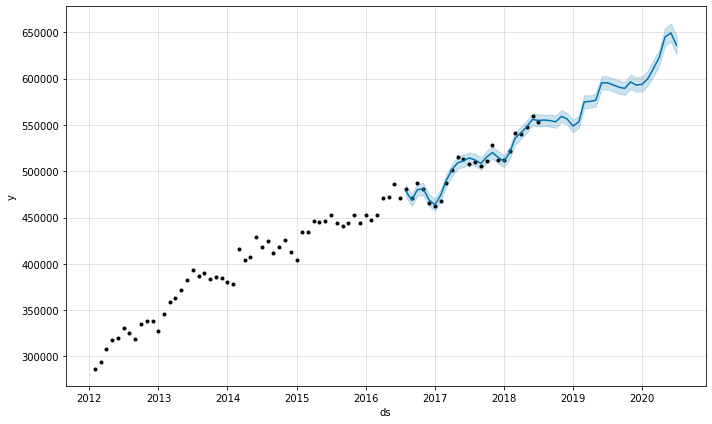

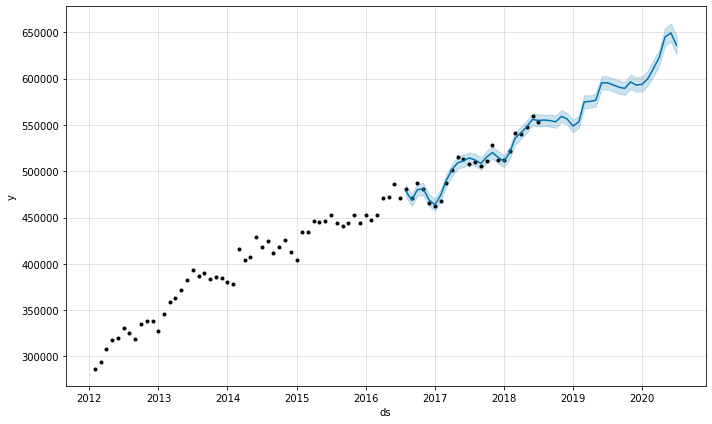

In [155]:
# Plot of the actual and forecasted model

m.plot(forecast)

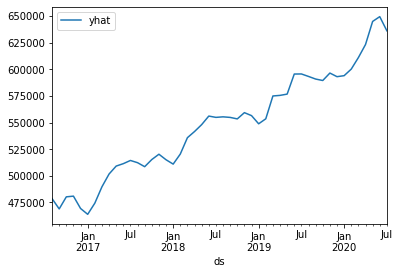

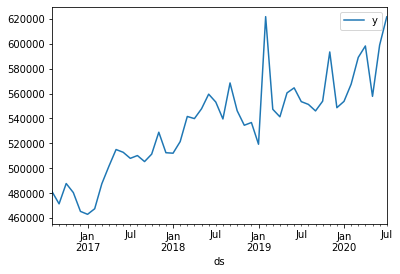

In [156]:
# Plot of predited and actual values

forecast.plot('ds', 'yhat');
test.plot('ds', 'y');

In [157]:
# Calculating the forecast errors

from sklearn.metrics import mean_squared_error
print('RMSE for the forecast:', mean_squared_error(test['y'], forecast['yhat'], squared=False))

RMSE for the forecast: 26432.238681781066


In [158]:
# Performing future forecast August 2020 to July 2021

m1 = Prophet()

In [159]:
m1.fit(df3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [160]:
future = m1.make_future_dataframe(periods=12,freq = 'MS')

In [161]:
future.tail()

,ds
109,2021-03-01
110,2021-04-01
111,2021-05-01
112,2021-06-01
113,2021-07-01


In [162]:
df3.tail()

,ds,y,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply
97,2020-03-01,589000.000000,3709.081081,48.135135,0.992018,1061.567568,1350.621622,2457.216216,990.162162,2.821622
98,2020-04-01,598189.189189,3387.729730,44.945946,0.987829,866.081081,960.000000,2462.729730,754.054054,3.456757
99,2020-05-01,557729.729730,3754.945946,45.702703,0.981610,784.513514,1321.081081,2576.675676,967.945946,4.697297
100,2020-06-01,598864.864865,4021.216216,53.324324,0.986052,1148.756757,1471.486486,2463.540541,1238.972973,2.967568
101,2020-07-01,621567.567568,4040.675676,40.621622,0.992940,1430.567568,1603.459459,2321.945946,1399.324324,2.151351


In [163]:
future_forecast = m1.predict(future)

In [164]:
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
102,2020-08-01,592351.683228,577569.949848,606874.343597
103,2020-09-01,586461.819874,571371.727831,600552.233851
104,2020-10-01,595311.105061,579408.873297,610345.164973
105,2020-11-01,593053.145949,578174.144597,608747.342709
106,2020-12-01,589634.806710,574461.638813,604289.070393
107,2021-01-01,581688.984696,567370.156248,596359.657044
108,2021-02-01,598871.466227,583492.194345,614318.298416
109,2021-03-01,605286.678006,590831.258899,620182.444824
110,2021-04-01,611492.217619,596966.435171,626481.705047
111,2021-05-01,610879.343370,594724.513118,625488.112566


In [165]:
# Average high and low prices forecasted

print(future_forecast['yhat'].mean())
print(future_forecast['yhat_lower'].mean())
print(future_forecast['yhat_upper'].mean())

476942.62359779276
461990.9743154315
491752.3983386632


In [166]:
# Offset between high and low price

print(491797.4891217105 - 476942.62359779276)

14854.865523917717


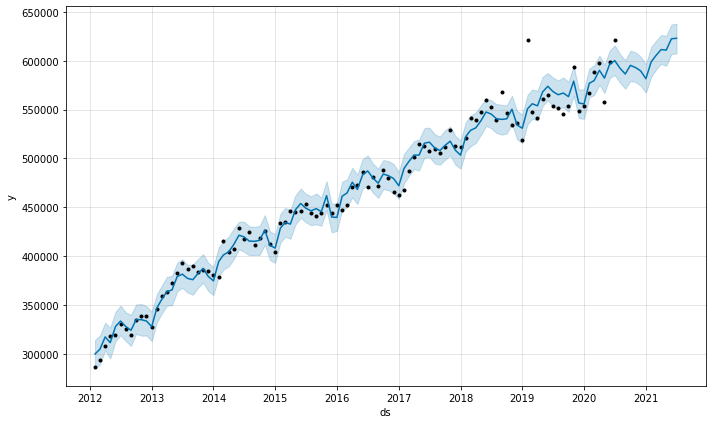

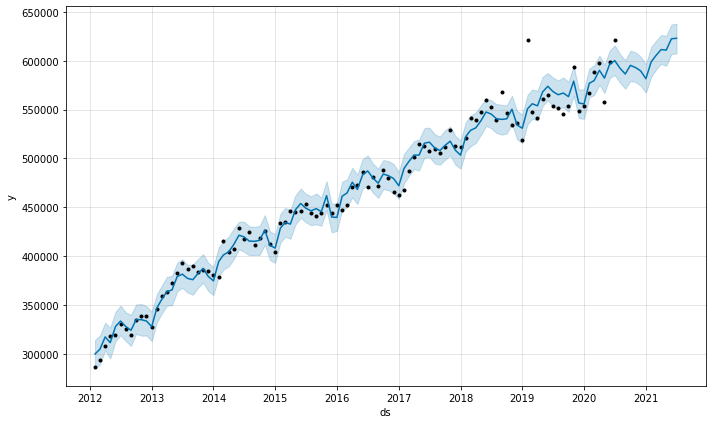

In [167]:
m1.plot(future_forecast)

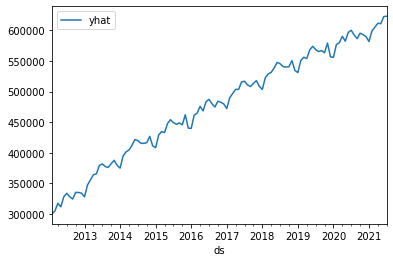

In [168]:
future_forecast.plot(x='ds',y='yhat');

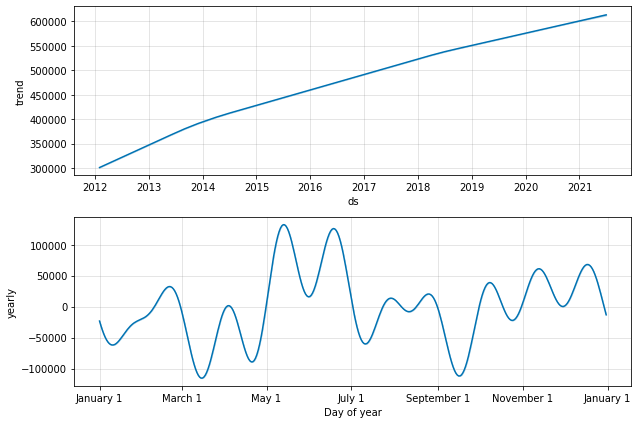

In [169]:
m.plot_components(future_forecast);

The model hows that there is an overall rise in the housing prices and it will continue into the following year 2021.

### Neural network LSTM model

The dataset is converted into a supervised learining dataset to be fed to the neural network model such that the t-n time series will be used to predict the t-1 and t time series which is generated from the data columns. 

In [43]:

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [44]:
d = np.log(df_top5) #.diff(2).dropna()

In [170]:
d

,active_listings,Median Dom,Avg Sale To List,Homes Sold,New Listings,Inventory,pending_sales,months_of_supply,Median Sale Price
Period End,,,,,,,,,
2012-02-01,8.622959,4.606558,-0.033604,6.826063,7.248544,8.337315,6.740191,1.692553,12.567141
2012-03-01,8.648577,4.588928,-0.027716,7.075457,7.395807,8.321178,6.970652,1.470176,12.591618
2012-04-01,8.620061,4.480803,-0.026875,7.081942,7.329677,8.309711,6.950948,1.415718,12.638216
2012-05-01,8.615771,4.374708,-0.023065,7.211762,7.343067,8.281197,7.025761,1.576111,12.669981
2012-06-01,8.576384,4.309680,-0.019823,7.236079,7.270255,8.244998,6.955619,1.293966,12.674773
...,...,...,...,...,...,...,...,...,...
2020-03-01,8.218539,3.874012,-0.008014,6.967502,7.208320,7.806784,6.897869,1.037312,13.286181
2020-04-01,8.127915,3.805461,-0.012246,6.763979,6.866933,7.809026,6.625464,1.240331,13.301662
2020-05-01,8.230829,3.822157,-0.018562,6.665064,7.186206,7.854255,6.875176,1.546987,13.231630


In [45]:
# values = d.values
values = d.values

In [46]:
values[:10]

array([[ 8.62295863,  4.60655811, -0.03360355,  6.82606306,  7.24854358,
         8.33731531,  6.74019096,  1.69255282, 12.5671407 ],
       [ 8.64857714,  4.58892788, -0.02771558,  7.07545659,  7.39580687,
         8.32117831,  6.97065183,  1.47017585, 12.59161845],
       [ 8.6200606 ,  4.48080302, -0.02687517,  7.08194199,  7.32967683,
         8.30971108,  6.95094779,  1.41571831, 12.63821575],
       [ 8.61577075,  4.37470825, -0.02306463,  7.21176171,  7.34306681,
         8.28119656,  7.02576051,  1.57611091, 12.66998135],
       [ 8.57638411,  4.30967993, -0.01982327,  7.23607933,  7.27025489,
         8.24499798,  6.95561909,  1.29396584, 12.67477334],
       [ 8.53291342,  4.2642436 , -0.01844214,  7.14993864,  7.19899352,
         8.17076714,  6.98256638,  1.38976057, 12.70937   ],
       [ 8.47540429,  4.3044404 , -0.01917673,  7.22370082,  7.18973362,
         8.10190499,  6.96342648,  1.34518297, 12.69371493],
       [ 8.40801057,  4.24650914, -0.01822324,  6.99150904,  7

In [47]:
values = values.astype('float32')

In [48]:
# Scaling the dataset to account for outliers

from sklearn.preprocessing import MinMaxScaler
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()

In [49]:
# Reframed as supervised learning

reframed = series_to_supervised(values, 2, 1)

In [50]:
reframed.head()

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
2,8.622958,4.606558,-0.033604,6.826063,7.248544,8.337316,6.740191,1.692553,12.567141,8.648577,4.588928,-0.027716,7.075457,7.395807,8.321178,6.970652,1.470176,12.591619,8.620061,4.480803,-0.026875,7.081942,7.329677,8.309711,6.950948,1.415718,12.638216
3,8.648577,4.588928,-0.027716,7.075457,7.395807,8.321178,6.970652,1.470176,12.591619,8.620061,4.480803,-0.026875,7.081942,7.329677,8.309711,6.950948,1.415718,12.638216,8.615770,4.374708,-0.023065,7.211762,7.343067,8.281197,7.025761,1.576111,12.669981
4,8.620061,4.480803,-0.026875,7.081942,7.329677,8.309711,6.950948,1.415718,12.638216,8.615770,4.374708,-0.023065,7.211762,7.343067,8.281197,7.025761,1.576111,12.669981,8.576385,4.309680,-0.019823,7.236079,7.270255,8.244998,6.955619,1.293966,12.674773
5,8.615770,4.374708,-0.023065,7.211762,7.343067,8.281197,7.025761,1.576111,12.669981,8.576385,4.309680,-0.019823,7.236079,7.270255,8.244998,6.955619,1.293966,12.674773,8.532913,4.264244,-0.018442,7.149939,7.198994,8.170767,6.982566,1.389761,12.709370
6,8.576385,4.309680,-0.019823,7.236079,7.270255,8.244998,6.955619,1.293966,12.674773,8.532913,4.264244,-0.018442,7.149939,7.198994,8.170767,6.982566,1.389761,12.709370,8.475405,4.304440,-0.019177,7.223701,7.189734,8.101905,6.963427,1.345183,12.693715


In [51]:
reframed.drop(reframed[['var9(t-2)','var9(t-1)']], axis=1, inplace=True)
# reframed.drop(reframed[['var9(t-1)']], axis=1, inplace=True)
# reframed.drop(reframed.columns[8:17], axis=1, inplace=True)
reframed.head()

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
2,8.622958,4.606558,-0.033604,6.826063,7.248544,8.337316,6.740191,1.692553,8.648577,4.588928,-0.027716,7.075457,7.395807,8.321178,6.970652,1.470176,8.620061,4.480803,-0.026875,7.081942,7.329677,8.309711,6.950948,1.415718,12.638216
3,8.648577,4.588928,-0.027716,7.075457,7.395807,8.321178,6.970652,1.470176,8.620061,4.480803,-0.026875,7.081942,7.329677,8.309711,6.950948,1.415718,8.615770,4.374708,-0.023065,7.211762,7.343067,8.281197,7.025761,1.576111,12.669981
4,8.620061,4.480803,-0.026875,7.081942,7.329677,8.309711,6.950948,1.415718,8.615770,4.374708,-0.023065,7.211762,7.343067,8.281197,7.025761,1.576111,8.576385,4.309680,-0.019823,7.236079,7.270255,8.244998,6.955619,1.293966,12.674773
5,8.615770,4.374708,-0.023065,7.211762,7.343067,8.281197,7.025761,1.576111,8.576385,4.309680,-0.019823,7.236079,7.270255,8.244998,6.955619,1.293966,8.532913,4.264244,-0.018442,7.149939,7.198994,8.170767,6.982566,1.389761,12.709370
6,8.576385,4.309680,-0.019823,7.236079,7.270255,8.244998,6.955619,1.293966,8.532913,4.264244,-0.018442,7.149939,7.198994,8.170767,6.982566,1.389761,8.475405,4.304440,-0.019177,7.223701,7.189734,8.101905,6.963427,1.345183,12.693715


In [52]:
df = reframed


In [53]:
train_data = df[:-10].values
test_data = df[-10:].values

In [54]:
train_data.shape

(90, 25)

In [55]:
# Train test split

x_train, y_train = train_data[:, :-1], train_data[:, -1]
x_test, y_test = test_data[:, :-1], test_data[:, -1]

In [57]:
train_X = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
test_X = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [58]:
print(train_X.shape, y_train.shape, test_X.shape, y_test.shape)

(90, 1, 24) (90,) (10, 1, 24) (10,)


In [59]:
# Scaling the training and testing data

xscaler.fit(x_train)
scaled_x_train = xscaler.transform(x_train)
scaled_x_test = xscaler.transform(x_test)

In [60]:
yscaler.fit(np.array(y_train).reshape(-1,1))
y_train = yscaler.transform(np.array(y_train).reshape(-1,1))
y_test = yscaler.transform(np.array(y_test).reshape(-1,1))

In [61]:
train_X = scaled_x_train.reshape((scaled_x_train.shape[0], scaled_x_train.shape[1], 1))
test_X = scaled_x_test.reshape((scaled_x_test.shape[0], scaled_x_test.shape[1], 1))

In [62]:
# Fitting the LSTM network

from keras.models import Sequential
from keras.layers import Dense, LSTM, RepeatVector, Dropout
from keras.callbacks import EarlyStopping

In [106]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))#, return_sequences=True))
# lstm_model.add(RepeatVector(3))
# lstm_model.add(Dense(10, activation='relu'))
# lstm_model.add(LSTM(50, activation='relu', return_sequences=True))
lstm_model.add(Dense(5, activation='relu'))
# # lstm_model.add(Dropout(rate=0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 505       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 41,311
Trainable params: 41,311
Non-trainable params: 0
_________________________________________________________________


In [107]:
lstm_fit = lstm_model.fit(x=train_X, y=y_train, epochs=200, batch_size=10, validation_split=0.20) #callbacks=EarlyStopping(monitor='val_loss'))

Epoch 1/200
8/8 [==============================] - 1s 49ms/step - loss: 0.2080 - val_loss: 0.4364
Epoch 2/200
8/8 [==============================] - 0s 15ms/step - loss: 0.0917 - val_loss: 0.1514
Epoch 3/200
8/8 [==============================] - 0s 16ms/step - loss: 0.0576 - val_loss: 0.1177
Epoch 4/200
8/8 [==============================] - 0s 16ms/step - loss: 0.0489 - val_loss: 0.2053
Epoch 5/200
8/8 [==============================] - 0s 15ms/step - loss: 0.0548 - val_loss: 0.1833
Epoch 6/200
8/8 [==============================] - 0s 17ms/step - loss: 0.0505 - val_loss: 0.1377
Epoch 7/200
8/8 [==============================] - 0s 15ms/step - loss: 0.0480 - val_loss: 0.1681
Epoch 8/200
8/8 [==============================] - 0s 16ms/step - loss: 0.0482 - val_loss: 0.1513
Epoch 9/200
8/8 [==============================] - 0s 14ms/step - loss: 0.0502 - val_loss: 0.1297
Epoch 10/200
8/8 [==============================] - 0s 14ms/step - loss: 0.0478 - val_loss: 0.1685
Epoch 11/200
8/8 [=

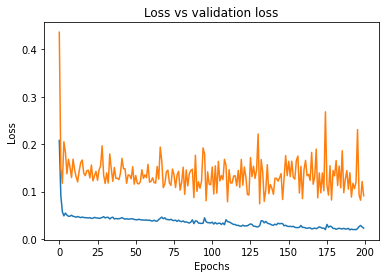

In [108]:
# Model evaluation 

plt.plot(lstm_fit.history['loss'])
plt.plot(lstm_fit.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs validation loss')
plt.show()

In [109]:
# Model prediction

yhat = lstm_model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))

In [110]:
# Reverting to the original scaling 

yhat = yscaler.inverse_transform(np.array(yhat).reshape(-1,1))

In [111]:
df_yhat = pd.Series(yhat.reshape(-1,))

In [112]:
df_yhat

0    12.966442
1    12.890130
2    13.040521
3    13.097569
4    13.165246
5    13.198277
6    13.067283
7    12.970789
8    13.090461
9    13.231977
dtype: float32

In [113]:
yhat = np.exp(df_yhat)

In [114]:
yhat

0    427813.28125
1    396380.53125
2    460708.43750
3    487755.00000
4    521907.65625
5    539434.43750
6    473204.40625
7    429676.93750
8    484300.46875
9    557923.68750
dtype: float32

In [115]:
y_test = np.exp(yscaler.inverse_transform(y_test))

In [116]:
y_test

array([[553838.06],
       [593378.5 ],
       [548621.6 ],
       [553702.8 ],
       [567513.4 ],
       [589000.  ],
       [598189.25],
       [557729.5 ],
       [598865.1 ],
       [621568.3 ]], dtype=float32)

In [118]:
# Evaluating the model's peformance

from sklearn.metrics import mean_squared_error

In [121]:
print('MSE:', (mean_squared_error(y_test.reshape(-1,), yhat))**0.5)

MSE: 109772.16492353605


In [122]:
df_ytest = pd.Series(data=np.array(y_test).reshape(-1,))

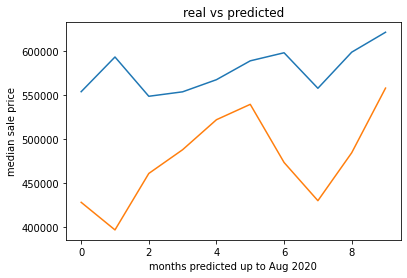

In [123]:
df_ytest.plot()
yhat.plot()
plt.ylabel('median sale price')
plt.xlabel('months predicted up to Aug 2020')
plt.title('real vs predicted')
plt.show()

The facebook prophet model performed the best having the lowest MSE of the three models. Forecasts were done using the prophet model and the average price of properties for the top five states with the most expensive properties was estimated to be about $500,000. 

A future idea of this project can be exploring the latest data to explore future predictions for properties in particular states or metropolitan areas.